In [19]:
# Make sure we have the packages we need

import numpy as np
import scipy as sc
import math

# Configuring matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.style.use('dark_background')
plt.rcParams["image.cmap"] = 'spring'

# Choosing a colormap for the plot colors
cmap=plt.get_cmap('spring')

In [20]:
def update_infection(N,beta,kappa,I_t):
    """
    Given set of infected nodes I, update infection
    Parameters
    ----------
    N: (int) Size of grid (NxN)
    beta: infection rate (recovery rate set to 1)
    I_t: Set of infected neighbors at time t
    Returns
    ----------
    I_tplus: Set of infected neighbors at time t+1
    """
    I_tplus = I_t
    Lambda = 1.0 + 4.0*beta + kappa
    event = np.random.choice(['r','i','n'], p=[1.0/Lambda, 4.0*beta/Lambda,kappa/Lambda])
    if event == 'r':
      node_heal = tuple(np.random.randint(1,N+1,2))
      if node_heal in I_tplus: I_tplus.remove(node_heal)
    elif event == 'i':
      N_grid = np.arange(1,N+1)
      node_spread = tuple(np.random.randint(1,N+1,2))
      if node_spread in I_tplus:
        dirs = np.concatenate((np.eye(2),0-np.eye(2)),axis=0).astype(int)  
        node_infect = tuple(map(sum, zip(node_spread, dirs[np.random.choice(4)])))    
        if (node_infect[0] in N_grid) and (node_infect[1] in N_grid):
          if node_infect not in I_tplus: I_tplus.append(node_infect)
    else:
      node_infect = tuple(np.random.randint(1,N+1,2))
      I_tplus.append(node_infect)            
    return I_tplus        


def draw_network(N,I,fig):
  plt.xlim(0,N+1)
  plt.ylim=(0,N+1)
  n = np.arange(1,N+1)
  plt.plot(np.repeat(n,N),np.tile(n,N), '.g',markerfacecolor='None')
  for node in I:
    plt.plot(node[0],node[1], '.r')

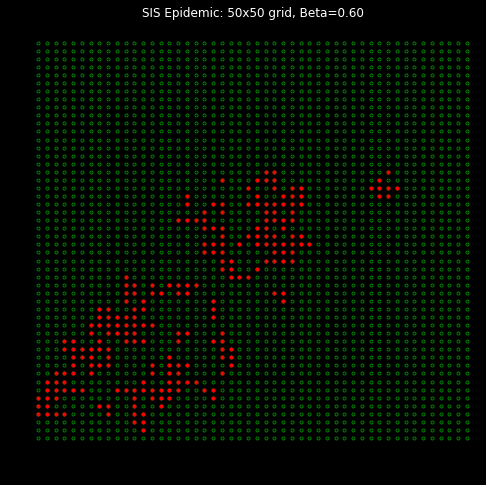

In [14]:
from IPython import display
import time

N = 50
np.random.seed(0)              
beta = 0.6
kappa = 0.0001

T = 100000
I_t = [(int(N/2),int(N/2)),((int(N/4),int(N/4)))]

fig = plt.figure(figsize=(8,8))
plt.title('SIS Epidemic: %ix%i grid, Beta=%0.2f' % (N,N,beta))
plt.axis('off')
fig.set_facecolor(('xkcd:black'))
draw_network(N,I_t,fig)

step = 500
for t in range(T):
  I_t = update_infection(N,beta,kappa,I_t)
  if t%step == 0:
    display.clear_output(wait=True)
    fig = plt.figure(figsize=(8,8))
    plt.title('SIS Epidemic: %ix%i grid, Beta=%0.2f' % (N,N,beta))
    plt.axis('off')
    fig.set_facecolor(('xkcd:black'))
    draw_network(N,I_t,fig)
    plt.show()
    time.sleep(0)

In [21]:
%%capture
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

N = 50
N_grid = np.arange(1,N+1)

np.random.seed(3)              
beta1 = 0.45
beta2 = 0.55
kappa = 0.0001
I1_t = [(int(N/2),int(N/2)),((int(N/4),int(N/4)))]
I2_t = [(int(N/2),int(N/2)),((int(N/4),int(N/4)))]

n_frames = 50
t_step = 2500

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
#fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
ax1.set_title('SIS Epidemic: %ix%i grid, Beta=%0.2f' % (N,N,beta1))
ax2.set_title('SIS Epidemic: %ix%i grid, Beta=%0.2f' % (N,N,beta2))
ax1.axis('off')
ax2.axis('off')
ax1.set_facecolor(('xkcd:black'))
ax2.set_facecolor(('xkcd:black'))
ax1.set(xlim=(0,N+1), ylim=(0,N+1))
ax2.set(xlim=(0,N+1), ylim=(0,N+1))

# intialize two line objects (one in each axes)
line1, = ax1.plot(np.repeat(N_grid,N),np.tile(N_grid,N), '.g',markerfacecolor='None')
line2, = ax2.plot(np.repeat(N_grid,N),np.tile(N_grid,N), '.g',markerfacecolor='None')
line = [line1, line2]

def animate(i):
  global I1_t
  global I2_t
  for t in range(t_step):
    I1_t = update_infection(N,beta1,kappa,I1_t)
    I2_t = update_infection(N,beta1,kappa,I2_t)
  line1, = ax1.plot(np.repeat(N_grid,N),np.tile(N_grid,N), '.g',markerfacecolor='None')
  line2, = ax2.plot(np.repeat(N_grid,N),np.tile(N_grid,N), '.g',markerfacecolor='None')
  for node in I1_t:
    line1, = ax1.plot(node[0],node[1], '.r')
  for node in I2_t:
    line2, = ax2.plot(node[0],node[1], '.r')
  return [line1,line2]

# First way to display animation. Need to use 'jshtml' for Google Colab, 'html5' for localhost
#plt.rc('animation', html='html5')
ani = FuncAnimation(fig, animate, n_frames, interval=100, blit=True)

AttributeError: 'list' object has no attribute 'set_animated'

In [16]:
# Alternate way for displaying animation
HTML(ani.to_html5_video())

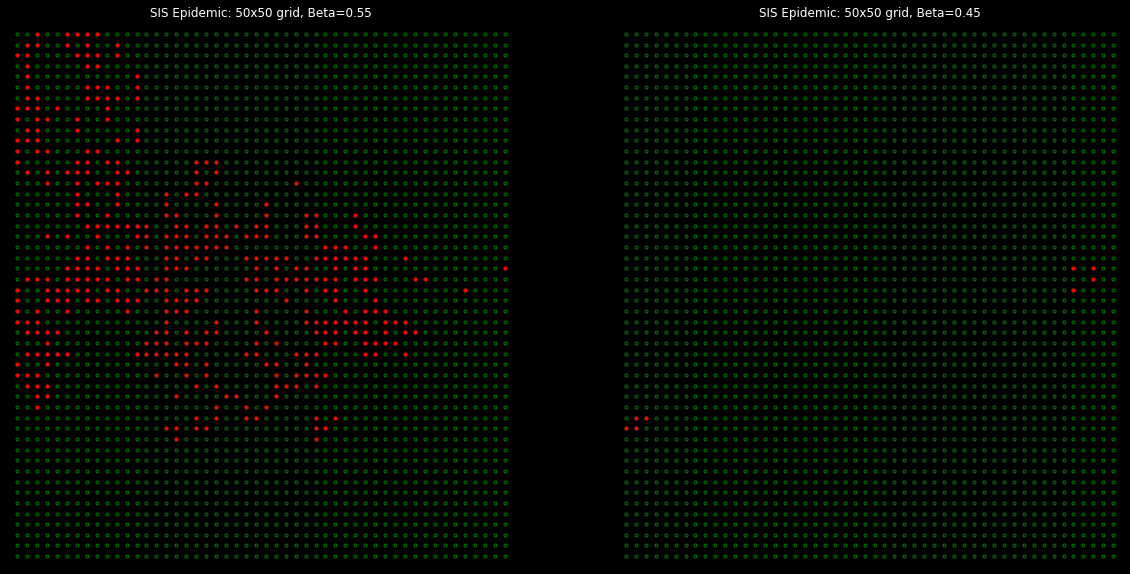

In [67]:
from IPython import display
import time

N = 50
n = np.arange(1,N+1)

np.random.seed(3)              
beta1 = 0.55
beta2 = 0.45
kappa = 0.0001

T = 200000
I1_t = [(int(N/2),int(N/2)),((int(N/4),int(N/4)))]
I2_t = [(int(N/2),int(N/2)),((int(N/4),int(N/4)))]

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
ax1.set_title('SIS Epidemic: %ix%i grid, Beta=%0.2f' % (N,N,beta1))
ax2.set_title('SIS Epidemic: %ix%i grid, Beta=%0.2f' % (N,N,beta2))
ax1.axis('off')
ax2.axis('off')
ax1.set_facecolor(('xkcd:black'))
ax2.set_facecolor(('xkcd:black'))
ax1.set(xlim=(0,N+1), ylim=(0,N+1))
ax2.set(xlim=(0,N+1), ylim=(0,N+1))

ax1.plot(np.repeat(n,N),np.tile(n,N), '.g',markerfacecolor='None')
ax2.plot(np.repeat(n,N),np.tile(n,N), '.g',markerfacecolor='None')
for node in I1_t:
  ax1.plot(node[0],node[1], '.r')
for node in I2_t:
  ax2.plot(node[0],node[1], '.r')

step = 2500
for t in range(T):
  I1_t = update_infection(N,beta1,kappa,I1_t)
  I2_t = update_infection(N,beta2,kappa,I2_t)

  if t%step == 0:
    display.clear_output(wait=True)
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
    ax1.set_title('SIS Epidemic: %ix%i grid, Beta=%0.2f' % (N,N,beta1))
    ax2.set_title('SIS Epidemic: %ix%i grid, Beta=%0.2f' % (N,N,beta2))
    ax1.axis('off')
    ax2.axis('off')
    ax1.set_facecolor(('xkcd:black'))
    ax2.set_facecolor(('xkcd:black'))
    ax1.set(xlim=(0,N+1), ylim=(0,N+1))
    ax2.set(xlim=(0,N+1), ylim=(0,N+1))
    ax1.plot(np.repeat(n,N),np.tile(n,N), '.g',markerfacecolor='None')
    ax2.plot(np.repeat(n,N),np.tile(n,N), '.g',markerfacecolor='None')
    for node in I1_t:
      ax1.plot(node[0],node[1], '.r')
    for node in I2_t:
      ax2.plot(node[0],node[1], '.r')
    plt.show()
    time.sleep(0)